# Lab 6: Confidence Intervals

Lab Done by: Lexie Peterson  
Partner: Kun Lee

In [3]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

In this lab, we will be working with a poisson distribution with a mean of 100. This has been created in the cell below.

In [4]:
background = stats.poisson.rvs(size=1000, mu=100)

## Problem 1

Our first goal is to simply find the signal value on our background distribution that corresponds to the 5σ sensitivity threshold. We can do this by taking the sum of the pmf (discrete probability distribution) until it is equal to the probability of 5σ for a standard normal distribution. The value where this sumation ends is the signal value we are looking for.

In [5]:
five_sigma_prob = stats.norm.cdf(5)
x_thresh = stats.poisson.ppf(five_sigma_prob, 100)
print('5-sigma Threshold:', x_thresh);

5-sigma Threshold: 154.0


## Problem 2

Now, we are going to inject some signals of a single strength into the backgorund distribution. I am going to work with a signal strength of 8σ because I want to work with a strong signal, but a sigma higher than 8 causes some rounding errors in python.

In [6]:
prob_sigma_8 = stats.norm.cdf(8)
signal_8 = stats.poisson.ppf(prob_sigma_8, 100)
print('8-sigma Signal:', signal_8);

8-sigma Signal: 190.0


Using the same method to find a 5σ value in problem one, I found the signal value associated with 8σ to be 190. To inject this value into background, I am going to add 190 to random index values of the background.

In [7]:
np.random.seed(42)

injected_signal = np.zeros(1000)
rand = np.random.randint(0,1000, 50)

for index in range(0,50):
    add = rand[index]
    injected_signal[add] = 190
back_signal = background + injected_signal

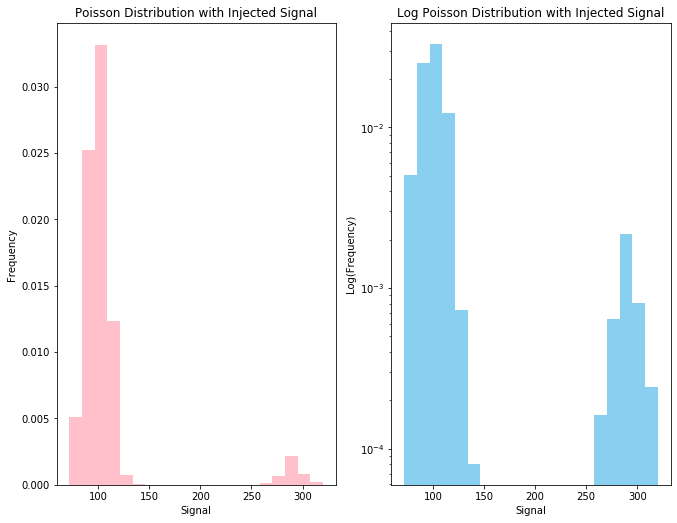

In [8]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(back_signal, density=True, bins=20, color='pink')
ax[0].set_title('Poisson Distribution with Injected Signal')
ax[0].set_xlabel('Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Poisson Distribution with Injected Signal')
ax[1].hist(back_signal, density=True, bins=20, color= '#89cff0');


The histograms above are the poisson background distribution with 50 injected signals. The left plot is linear while the right plot is logarithmic (included to show any tail abnormalities that would have been hard to seen in a linear plot). The main shape of this histogram is consitent with any poisson distribution; it almost looks gaussian but is dicrete with asymetric tails that can be seen best in the logarithmic histogram (the right tail dies a little quicker than the left). The secondary distribution (small peaks to the right of the large distribution) is the result of randomly injecting 50 signals with a value of 190. Since we randomly samplied a poisson distribution, the resulting shape of the secondary distribution is a poisson distribution. This is also supported by the asymetric shape of the distribution; the right tail dies faster than the left (similar to the main distibution). Additionally, this secondary distibution is not centered at 190, the value of the injected signal. Instead, it is centered at around 290. This leads me to the conclusion that the observed signal is baised. The observed signal is significantly more likely to be a higher value than the true injected value.

## Problem 3

Now, I am going to make a suite of injected signals with a range of 0 to 1000. I have choosen 1000 so that the end of the range has a very strong signal strength. For each signal value I will inject 1000 of those signals, so for a signal value of zero there will be 1000 injected signals of 0 into the initial poisson, then for a signal value of 1 there will be 1000 injected signals of 1, and so on and so forth until I get to a signal value of 1000.

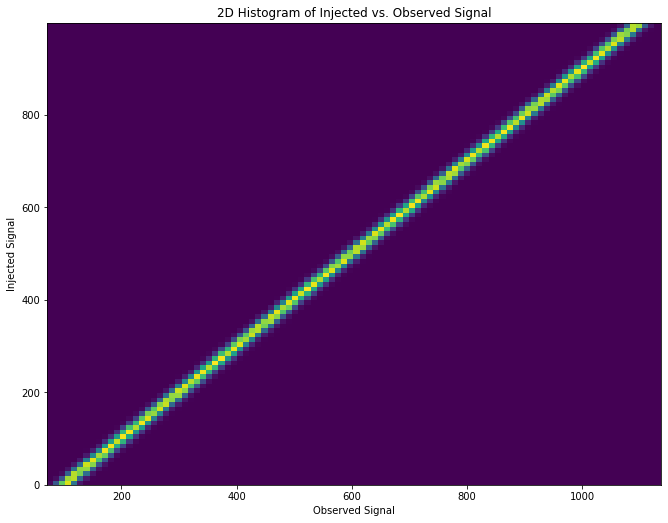

In [9]:
x = []
y = []

for signal in range(0,1000):
    for times in range(1000):
        x.append(stats.poisson.rvs(mu=100) + signal)
        y.append(signal)

fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)

ax.hist2d(x,y, bins=100)
ax.set_xlabel('Observed Signal')
ax.set_ylabel('Injected Signal')
ax.set_title('2D Histogram of Injected vs. Observed Signal');

The above histogram is the result of injecting the range of signals. It is a 2d histogram where the y-axis is the injected signal and the x-axis is the observed signal. The brighter the color the more counts there are in that area (purple is low, yellow is high). 

Now, I want to check that if I inject a signal of 190, I should still get a poisson distribution at 290. To do this I will be taking a slice of the above 2D histrogram when y = 190. The result of this is the 1D histograms below.

In [28]:
y[190000]
x_190 = x[190000:191000]


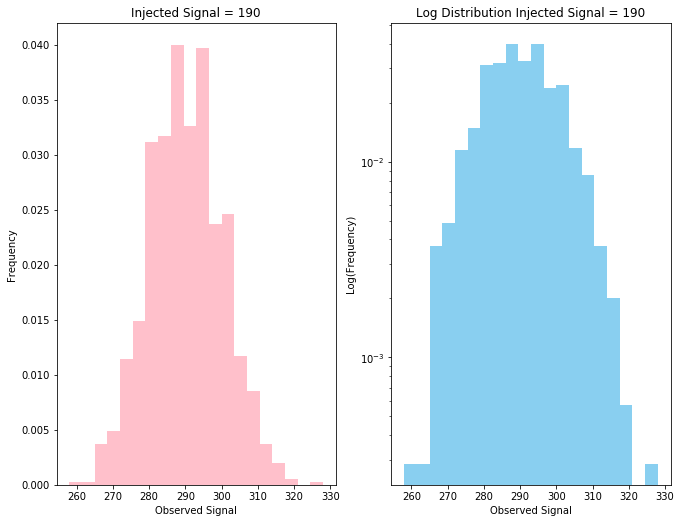

In [29]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(x_190, density=True, bins=20, color='pink')
ax[0].set_title('Injected Signal = 190')
ax[0].set_xlabel('Observed Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Observed Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Distribution Injected Signal = 190')
ax[1].hist(x_190, density=True, bins=20, color= '#89cff0');

Thankfully, as we expected the 1D histograms above are centered around 290 and they appear to be poisson distributed. This means for an injected signal of 190, we got a poisson distribution with a mean of 290, which is the same as the answer we found in problem 2.

Since I just found the slice of the 2D histogram of when the injected signal is 190, I now want to do the opposite. I am going to find a slice of the 2D histogram given an observed signal value. I have decided to go with a signal value with a strength of 7σ. I choose this value because I wanted one that was different from 8σ but still a strong value (remember finding the exact value for a sigma above 8 is hard in python with how it rounds).

In [30]:
prob_sigma_7 = stats.norm.cdf(7)
signal_7 = stats.poisson.ppf(prob_sigma_7, 100)
print('7-sigma Signal:', signal_7);

7-sigma Signal: 178.0


In [31]:
arr = np.array(x)
index_x = np.argwhere(arr == 178)

index_y = []
for value in range(0,1005):
    index_value_x = index_x[value]
    index_value_y = y[index_value_x[0]]
    index_y.append(index_value_y)
    

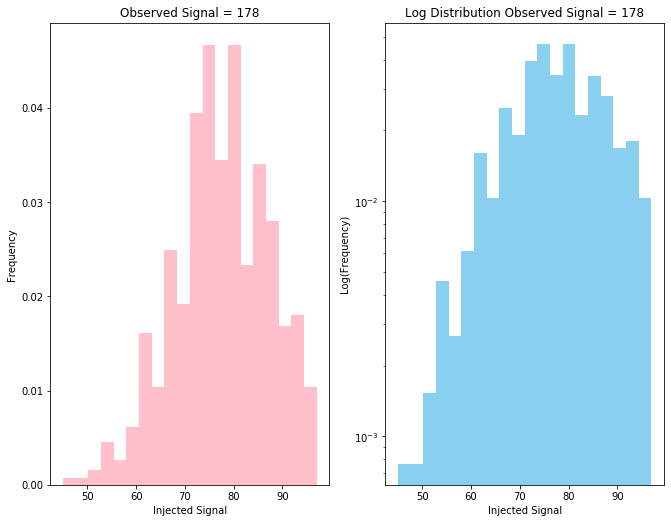

In [33]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(index_y, density=True, bins=20, color='pink')
ax[0].set_title('Observed Signal = 178')
ax[0].set_xlabel('Injected Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Injected Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Distribution Observed Signal = 178')
ax[1].hist(index_y, density=True, bins=20, color= '#89cff0');

The above histograms show the 1D slice of the 2D histogram for when the observed signal equals 178. This means that when we observe a signal of 178, the actual signal has a probability distribution as discribed above.  We might have expected for an observed signal of 178 we would get an injected signal of 178, but as we saw before since the distribution is poisson and centered around 100, we get a bias of 100. Due to the mean being non-zero we see our histograms being shifted to the left by 100. Additionally, since the mean is around 78, the actual signal for an observed signal of 178 could be 78, though it is possible to be any of the values in the range of the above distribution.To get a better idea of what is most likely to be the actually signal given this observed signal, I will find the 1σ uncertainty for the distribution above. 

In [47]:
mean = np.mean(index_y)

print('Mean:', mean)
prob_sigma_1 = stats.norm.cdf(1)
uncertainty1 = stats.poisson.ppf(prob_sigma_1, mean)
uncertainty2 = stats.poisson.ppf(1-prob_sigma_1, mean)
print('1-sigma uncertainty (left):',mean - uncertainty2)
print('1-sigma uncertainty (right):', uncertainty1 - mean)

Mean: 77.43283582089552
1-sigma uncertainty (left): 8.43283582089552
1-sigma uncertainty (right): 8.56716417910448


The 1σ uncertainty depends on which side of the mean we are looking at. One the left side of the mean, the signal value of 1σ is 69, while on the right side of the mean the 1σ signal value is 86. This means that values within -8.43 of the mean and values +8.56 of the mean are within the 1σ uncertainty. Since, the 8.43 and 8.46 are not equal, this means we have an asymmetric uncertainty, which makes sense since we have an asymmetric distribution. 

## Problem 4

Given the same 2D histogram as problem 3, I now want to see the injected signal distribution for a given signal strength around 1σ. 

In [57]:
prob_sigma_1 = stats.norm.cdf(1)
signal = stats.poisson.ppf(prob_sigma_1, 100)
print('1-sigma Signal:', signal);

1-sigma Signal: 110.0


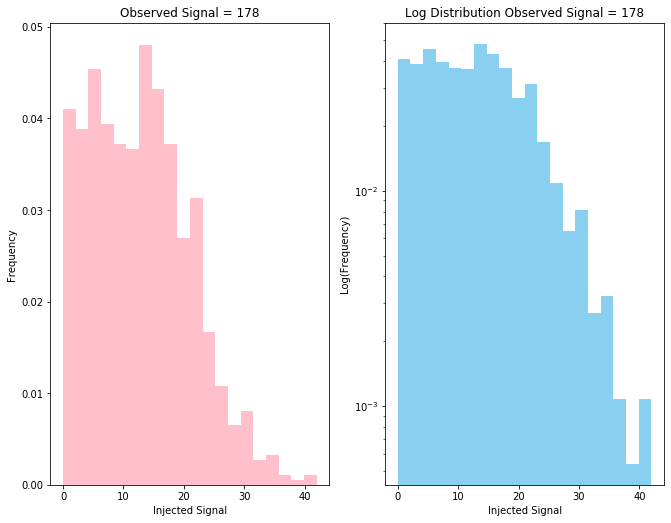

In [58]:
arr = np.array(x)
index_x = np.argwhere(arr == 110)

index_y = []
for value in range(0,882):
    index_value_x = index_x[value]
    index_value_y = y[index_value_x[0]]
    index_y.append(index_value_y)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5) 

ax[0].hist(index_y, density=True, bins=20, color='pink')
ax[0].set_title('Observed Signal = 178')
ax[0].set_xlabel('Injected Signal')
ax[0].set_ylabel('Frequency')

ax[1].set_yscale('log')
ax[1].set_xlabel('Injected Signal')
ax[1].set_ylabel('Log(Frequency)')
ax[1].set_title('Log Distribution Observed Signal = 178')
ax[1].hist(index_y, density=True, bins=20, color= '#89cff0');

The above histograms show the distribution of the injected signal given for an observed signal of 110 (a signal strenth of 1σ). Again we see the bais of this distribution by how it is not centered around 110 but instead around 10. The interesting thing to note about this distribution is that it extends to zero. An injected value of zero means that the observed value of 110 isn't actually a result of a signal, but is instead some noise of the background.

The last thing we wish to do in this lab is to calculate the 95% confidence upper bound. By this I mean, given an observed signal of 110, which is too weak to claim a detection, its true signal would be less than X 95% of the time, where X is the 95% confidence upper bound. I will find this upper bound simply by finding the value of the poisson distribution where the sum of the probability distribution is equal to 95%. 

In [59]:
mean = np.mean(index_y)
print('Mean:', np.mean(index_y))
confidence = stats.poisson.ppf(0.95, mean)
print('95% confidence upper bound:', confidence)

Mean: 12.846938775510203
95% confidence upper bound: 19.0


From this result, we can conclude that any value less 19 is the true value of the observed signal 95% of the time. 